In [1]:
from diffusers import StableDiffusionXLPipeline
import torch


pipeline: StableDiffusionXLPipeline = StableDiffusionXLPipeline.from_single_file(
    "/root/ComfyUI/models/checkpoints/animagine-xl-3.1.safetensors", 
    torch_dtype=torch.float16, 
    variant="fp16", 
    safety_checker=None, 
    config='/root/ComfyUI/models/checkpoints/Animagine3.1',
).to("cuda")
torch.manual_seed(42)


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [2]:
from sd_hooks import SDHiddenRecorder

In [6]:
recorder = SDHiddenRecorder(pipeline, ['down_blocks.2.attentions.0.transformer_blocks.0.attn1.to_k'])

  0%|          | 0/20 [00:00<?, ?it/s]

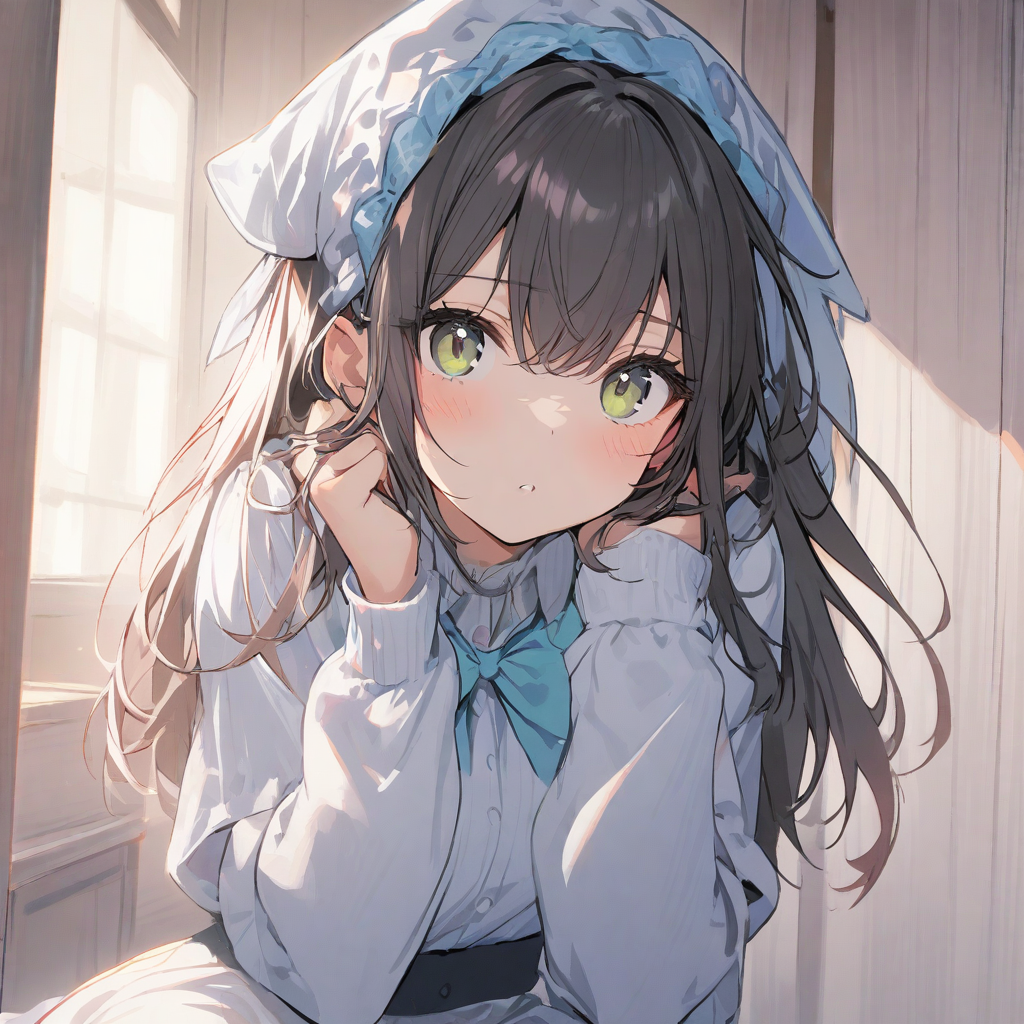

In [10]:
prompt = "1 girl, looking at viewer"
negative_prompt = "bad anatomy,blurry,(worst quality:1.8),low quality,hands bad,face bad,(normal quality:1.3),bad hands,mutated hands and fingers,extra legs,extra arms,duplicate,cropped,text,jpeg,artifacts,signature,watermark,username,blurry,artist name,trademark,title,multiple view,Reference sheet,long body,multiple breasts,mutated,bad anatomy,disfigured,bad proportions,duplicate,bad feet,artist name,ugly,text font ui,missing limb,monochrome,"
with torch.no_grad():
    image = pipeline(
    prompt=prompt, 
    negative_prompt=negative_prompt,
    num_inference_steps=20,
    callback_on_step_end=recorder,
).images[0]
recorder.hiddens.pop()
image

In [14]:
len(recorder.hiddens)

57

  0%|          | 0/57 [00:00<?, ?it/s]

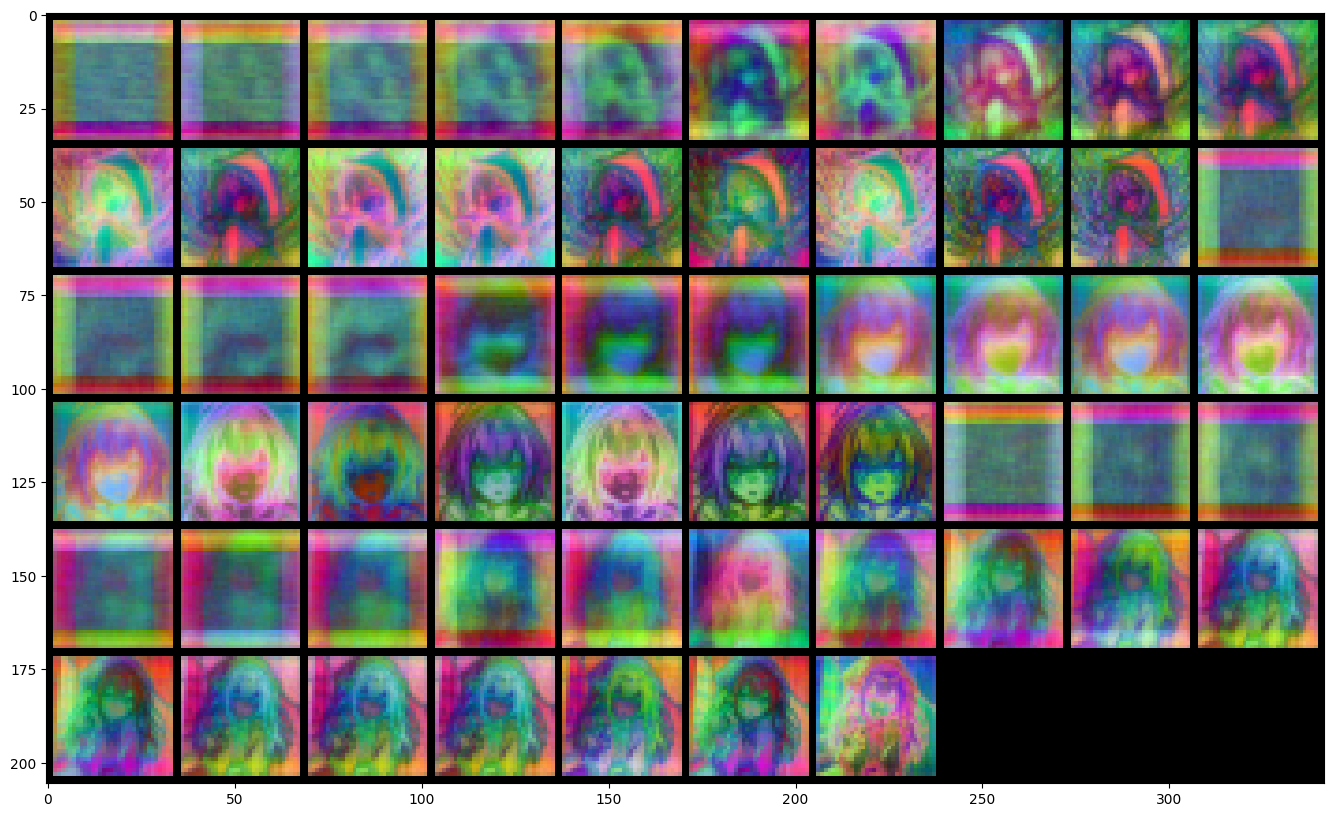

In [15]:
recorder.qkv_visualization('down_blocks.2.attentions.0.transformer_blocks.0.attn1.to_k')

In [7]:
sum(p.numel() for p in pipeline.unet.parameters())

2567463684

In [15]:
from pprint import pprint


pprint([name for name,_ in pipeline.unet.named_modules()])

['',
 'conv_in',
 'time_proj',
 'time_embedding',
 'time_embedding.linear_1',
 'time_embedding.act',
 'time_embedding.linear_2',
 'add_time_proj',
 'add_embedding',
 'add_embedding.linear_1',
 'add_embedding.linear_2',
 'down_blocks',
 'down_blocks.0',
 'down_blocks.0.resnets',
 'down_blocks.0.resnets.0',
 'down_blocks.0.resnets.0.norm1',
 'down_blocks.0.resnets.0.conv1',
 'down_blocks.0.resnets.0.time_emb_proj',
 'down_blocks.0.resnets.0.norm2',
 'down_blocks.0.resnets.0.dropout',
 'down_blocks.0.resnets.0.conv2',
 'down_blocks.0.resnets.1',
 'down_blocks.0.resnets.1.norm1',
 'down_blocks.0.resnets.1.conv1',
 'down_blocks.0.resnets.1.time_emb_proj',
 'down_blocks.0.resnets.1.norm2',
 'down_blocks.0.resnets.1.dropout',
 'down_blocks.0.resnets.1.conv2',
 'down_blocks.0.downsamplers',
 'down_blocks.0.downsamplers.0',
 'down_blocks.0.downsamplers.0.conv',
 'down_blocks.1',
 'down_blocks.1.attentions',
 'down_blocks.1.attentions.0',
 'down_blocks.1.attentions.0.norm',
 'down_blocks.1.atten